# Linear model from scratch

We will see gradient descent in action in linear regression (fitting a line). 

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

First we define our function for a line:

In [2]:
def lin(a, b, x):
    return a*x + b

And create our input and output vectors:

In [3]:
a = 3
b = 8

In [4]:
n = 30
x = random(n)
y = lin(a, b, x)

In [5]:
x

array([ 0.9662,  0.3866,  0.9124,  0.9378,  0.7605,  0.7892,  0.7023,  0.5313,  0.7993,  0.8719,
        0.1597,  0.1019,  0.6547,  0.7693,  0.7498,  0.0393,  0.7862,  0.7666,  0.8801,  0.5359,
        0.5648,  0.0819,  0.033 ,  0.2201,  0.4643,  0.1745,  0.2137,  0.9439,  0.2484,  0.9345])

In [6]:
y

array([ 10.8987,   9.1598,  10.7373,  10.8135,  10.2815,  10.3677,  10.107 ,   9.5938,  10.3978,
        10.6157,   8.479 ,   8.3058,   9.9642,  10.3079,  10.2495,   8.1178,  10.3585,  10.2999,
        10.6404,   9.6077,   9.6944,   8.2458,   8.099 ,   8.6602,   9.3929,   8.5234,   8.6412,
        10.8316,   8.7451,  10.8035])

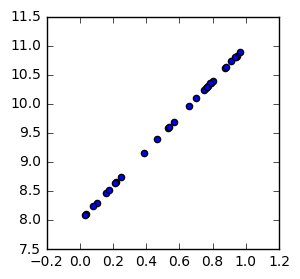

In [7]:
plt.scatter(x, y)

And we define our loss function:

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

Next, we forget the values of a and b, and make our guess:

In [24]:
a_guess = -1
b_guess = -1
avg_loss(y, a_guess, b_guess, x)

11.3334

Then, we need to define the partial derivatives for the loss function with respect to a and b, so that we can find the correct values for they:

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

This function will make a and b a little bit better every time is called:

In [11]:
def update():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

Finally, we call the update function a lot of times and we can see how our guess for a and b get better:

In [25]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): 
        update()
    return line

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

The avg_loss reduces and our final guess for a and b are similar to the correct values (3, 8):

In [26]:
avg_loss(y, a_guess, b_guess, x)

0.1893

In [27]:
a_guess, b_guess

(3.5987, 7.6344)